In [19]:
from io import StringIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from datetime import datetime, timedelta

%matplotlib inline

# Import of datasource

In [20]:
df = pd.read_csv('data/cleaned_dailydata.csv')
df_2 = pd.read_csv('data/cleaned_dailydata2.csv')

# Top 10 countries - total confirmed cases <> total active cases

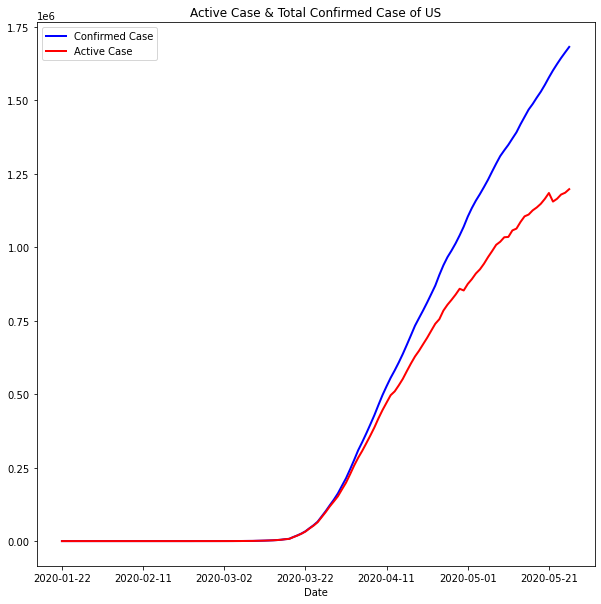

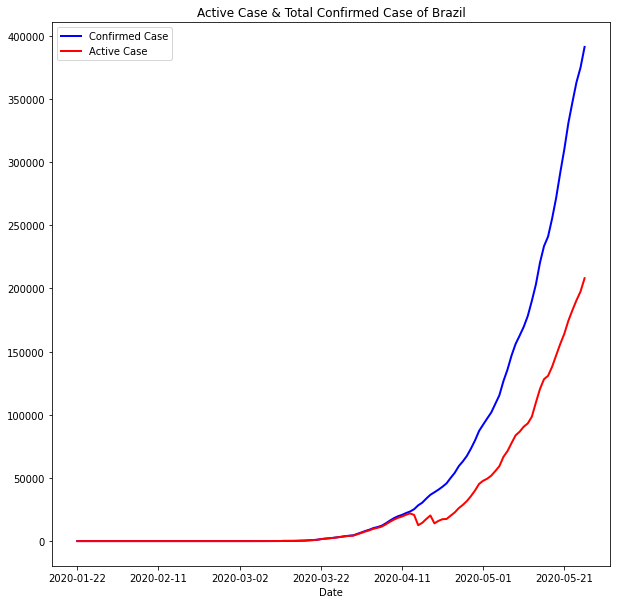

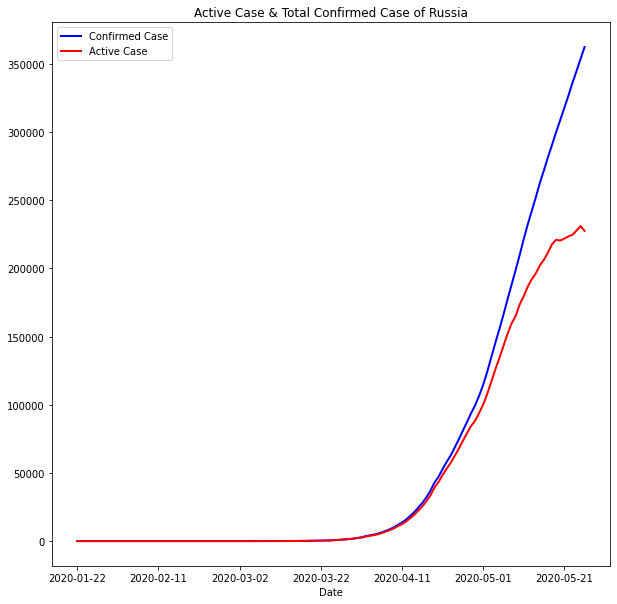

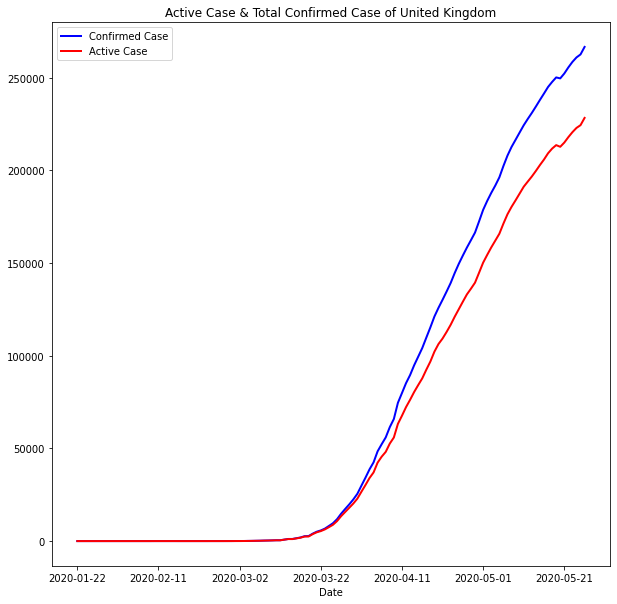

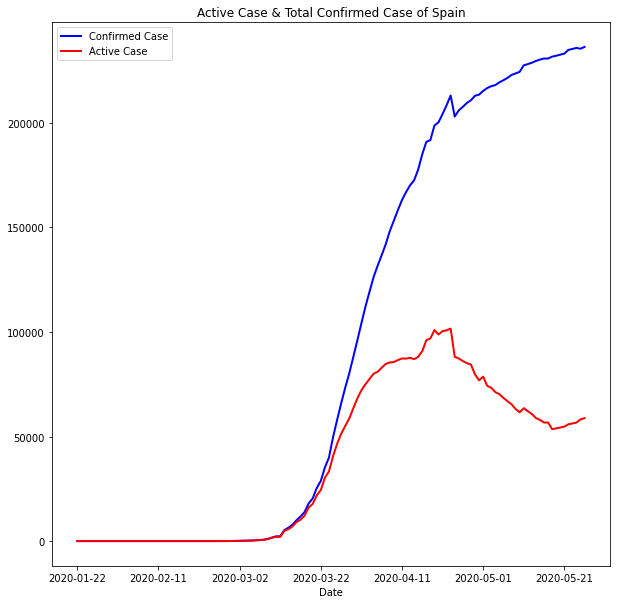

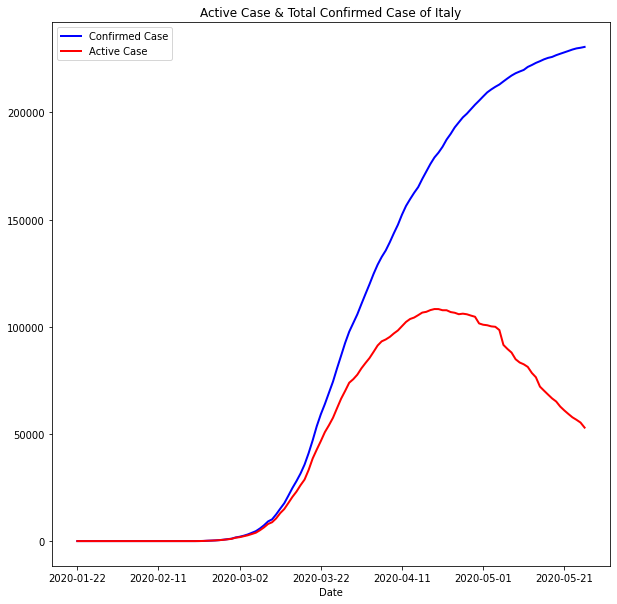

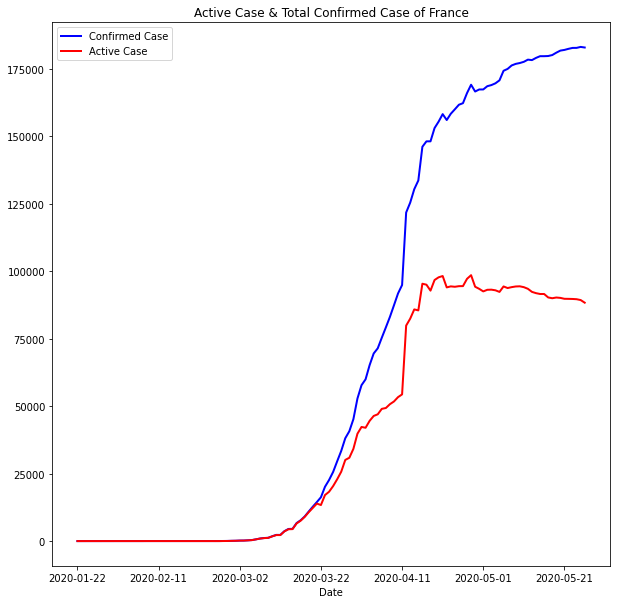

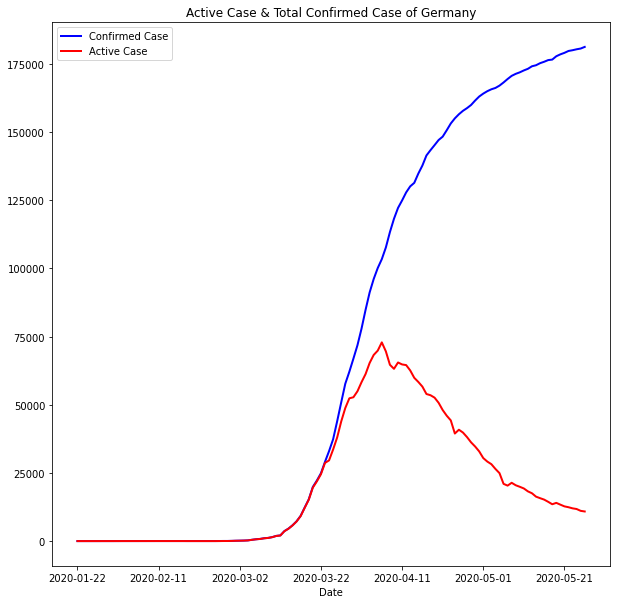

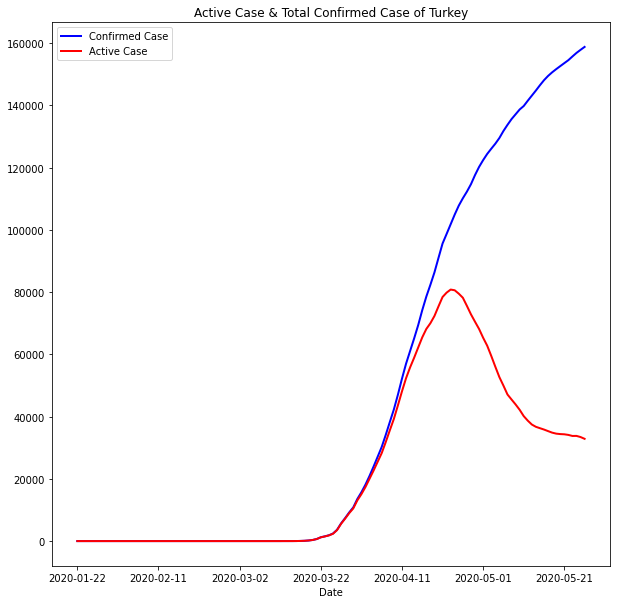

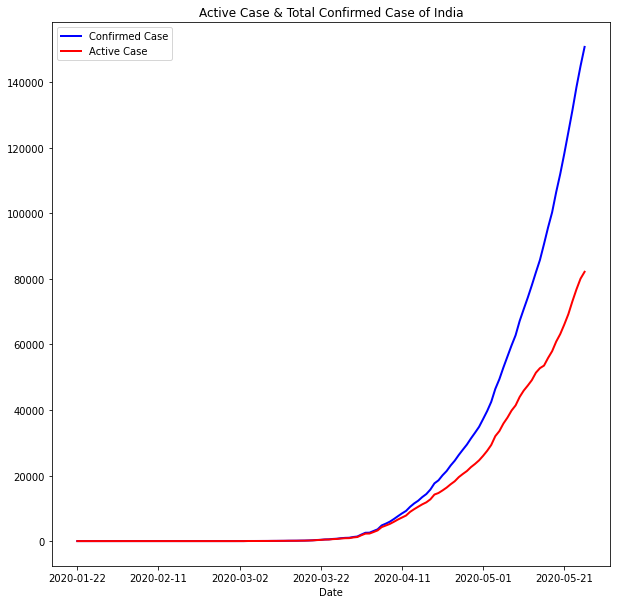

In [21]:
#Create new df for Countries with top 10 confirmed cases
df_top10_confirmed = df[df.Date == max(df.Date)].nlargest(10,'Confirmed')
top10_confirmed_countries_list = df_top10_confirmed['Country'].tolist()
top10_confirmed_countries_list

# Plot active cases <> total confirmed case
for i in range (0,len(top10_confirmed_countries_list)):
    plt.rcParams["figure.figsize"]= 10,10
    df_temp = df[df['Country'] == top10_confirmed_countries_list[i]]
    df_temp.plot(kind = 'line', x = 'Date', y = 'Confirmed', color = 'blue', label = 'Confirmed Case', linewidth = 2)
    ax1 = plt.gca()
    df_temp.plot(kind = 'line', x = 'Date', y = 'ActiveCase', color = 'red', ax = ax1, label = 'Active Case', linewidth = 2)
    plt.title('Active Case & Total Confirmed Case of ' + top10_confirmed_countries_list[i])
    plt.show()

# Scatterplots of Top 10 inflected countires

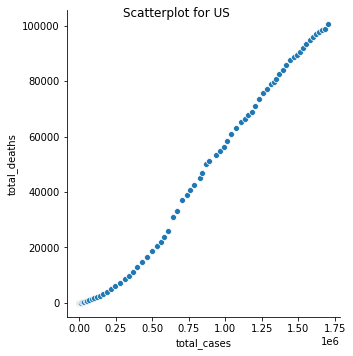

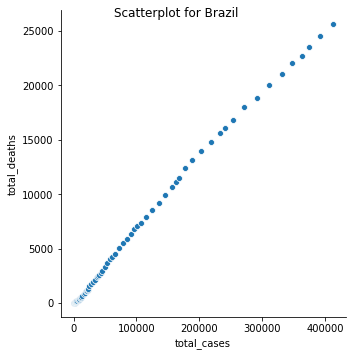

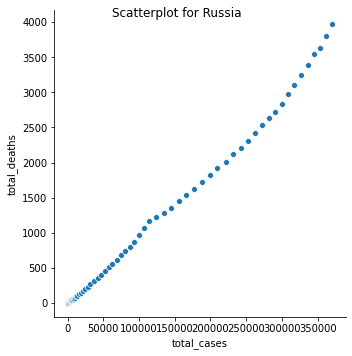

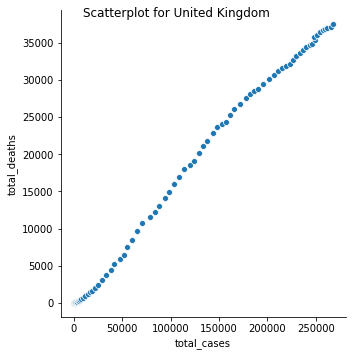

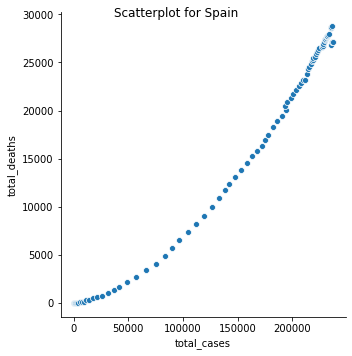

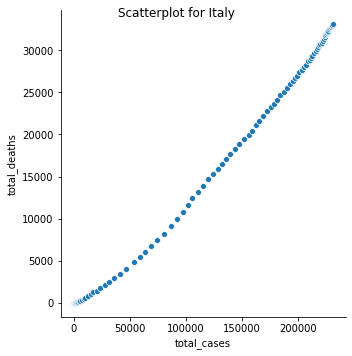

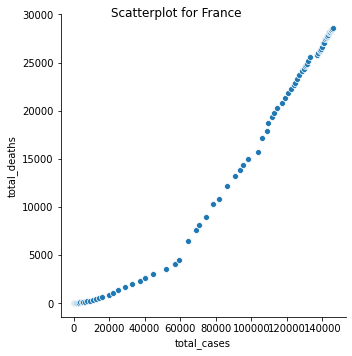

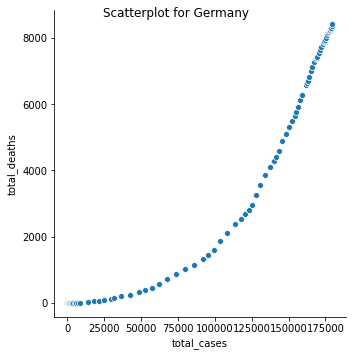

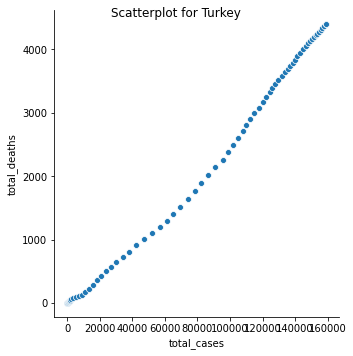

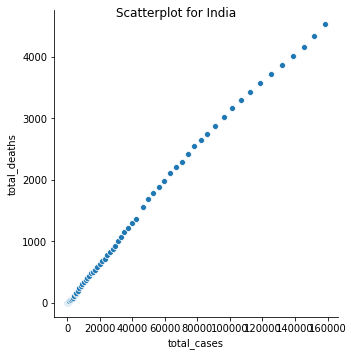

In [25]:
for i in range (0,len(top10_confirmed_countries_list)):
    df_temp = df_2[df_2['location'] == top10_confirmed_countries_list[i]]
    g = sns.relplot(x="total_cases", y="total_deaths", facet_kws=dict(sharex=False), legend="full", data=df_temp)
    g.fig.suptitle("Scatterplot for " + top10_confirmed_countries_list[i])

# Correlation

In [26]:
df_2_filtered = df_2[['total_cases','total_deaths','total_tests',
                      'population','population_density','median_age','aged_65_older','aged_70_older',
                     'handwashing_facilities', 'hospital_beds_per_100k', 'gdp_per_capita']]
corr = df_2_filtered.corr() 
corr

,total_cases,total_deaths,total_tests,population,population_density,median_age,aged_65_older,aged_70_older,handwashing_facilities,hospital_beds_per_100k,gdp_per_capita
total_cases,1.000000,0.990071,0.900831,0.555949,-0.017200,0.028555,0.029655,0.028553,0.014899,-0.004377,0.017181
total_deaths,0.990071,1.000000,0.809941,0.539772,-0.017287,0.037232,0.043754,0.043959,0.014510,-0.006990,0.018162
total_tests,0.900831,0.809941,1.000000,0.233575,-0.039429,0.102713,0.094305,0.092552,0.022623,0.047188,0.135653
population,0.555949,0.539772,0.233575,1.000000,-0.024891,-0.013932,-0.025820,-0.031708,0.026971,-0.031480,-0.056609
population_density,-0.017200,-0.017287,-0.039429,-0.024891,1.000000,0.163571,0.073053,0.044232,0.077665,0.329018,0.311133
median_age,0.028555,0.037232,0.102713,-0.013932,0.163571,1.000000,0.908111,0.893942,0.774370,0.660039,0.611246
aged_65_older,0.029655,0.043754,0.094305,-0.025820,0.073053,0.908111,1.000000,0.994221,0.614512,0.648383,0.454492
aged_70_older,0.028553,0.043959,0.092552,-0.031708,0.044232,0.893942,0.994221,1.000000,0.613471,0.650454,0.446317
handwashing_facilities,0.014899,0.014510,0.022623,0.026971,0.077665,0.774370,0.614512,0.613471,1.000000,0.435712,0.647166
hospital_beds_per_100k,-0.004377,-0.006990,0.047188,-0.031480,0.329018,0.660039,0.648383,0.650454,0.435712,1.000000,0.249841


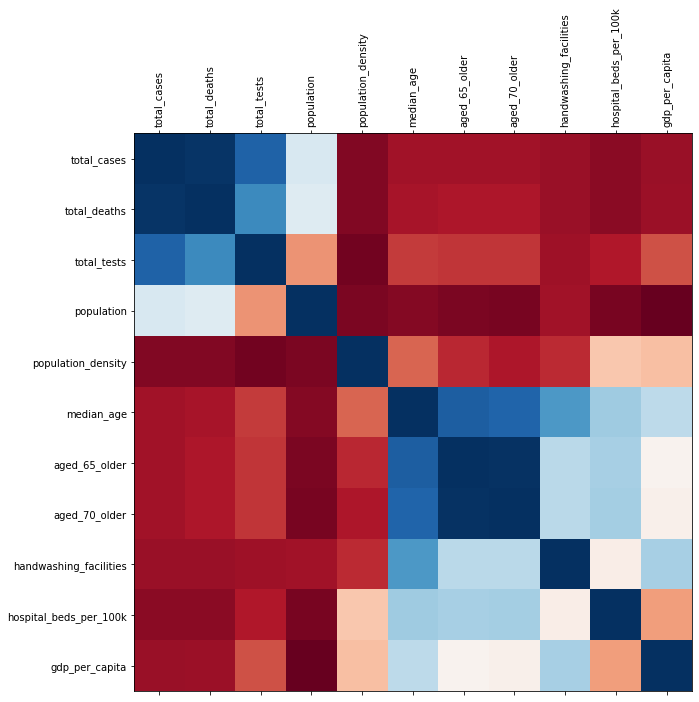

In [24]:
fig = plt.figure(figsize=(10,10))
plt.matshow(corr, cmap='RdBu',fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);